In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 8.8 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 212 kB 59.4 MB/s 
     |████████████████████████████████| 272 kB 55.0 MB/s 
     |████████████████████████████████| 2.3 MB 31.5 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 106 kB 57.5 MB/s 
     |████████████████████████████████| 63 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 11.3 MB/s 
     |████████████████████████████████| 68 kB 7.9 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 593 kB 50.4 MB/s 
     |████████████████████████████████| 856 kB 7

In [8]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
train_dir='/content/drive/MyDrive/pest/train'
test_dir='/content/drive/MyDrive/pest/test'

img_height,img_width=180,180
batch_size = 16
epochs = 20
num_classes = 9



In [10]:
training = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2700 files belonging to 9 classes.


In [20]:
testing = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 450 files belonging to 9 classes.


In [21]:
class_names = training.class_names
print(class_names)

['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


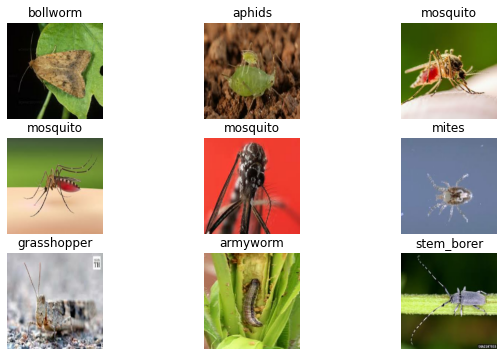

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [24]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [28]:
history = model.fit(training, validation_data=testing, epochs=epochs)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 383s 2s/step - loss: 1.7945 - accuracy: 0.3656 - val_loss: 1.1424 - val_accuracy: 0.6978
Epoch 2/20
169/169 [==============================] - 95s 563ms/step - loss: 0.4786 - accuracy: 0.8607 - val_loss: 0.5446 - val_accuracy: 0.9133
Epoch 3/20
169/169 [==============================] - 90s 531ms/step - loss: 0.0945 - accuracy: 0.9781 - val_loss: 0.5023 - val_accuracy: 0.9356
Epoch 4/20
169/169 [==============================] - 90s 530ms/step - loss: 0.0673 - accuracy: 0.9859 - val_loss: 0.4729 - val_accuracy: 0.9400
Epoch 5/20
169/169 [==============================] - 95s 560ms/step - loss: 0.0207 - accuracy: 0.9963 - val_loss: 0.5108 - val_accuracy: 0.9400
Epoch 6/20
169/169 [==============================] - 90s 531ms/step - loss: 0.0128 - accuracy: 0.9974 - val_loss: 0.5238 - val_accuracy: 0.9489
Epoch 7/20
169/169 [==============================] - 90s 533ms/step - loss: 0.0131 - accuracy: 0.9989 - val_loss: 0.5011 - val_accuracy: 0.944

In [31]:
model

In [32]:
from tensorflow.keras.models import Model
model.save('/content/drive/MyDrive/MODELS/v4_smallDatasetModel.h5')   # Saving model

In [29]:
def predict_image(img):
  img_3d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_3d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(9)}

In [30]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=9)



app = gr.Interface(fn=predict_image, inputs=image, outputs=label)

app.launch(share=True)

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://3a6759962a4a69ea.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f0db3aeaa50>,
 'http://127.0.0.1:7860/',
 'https://3a6759962a4a69ea.gradio.app')